<a name = "inicio"></a>
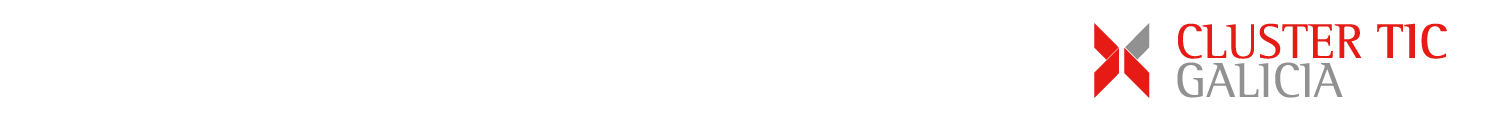

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Otras herramientas</div>

1. [Imágenes](#Imágenes)
1. [Guardando las figuras en disco](#Guardando-las-figuras-en-disco)
1. [Gráficos estáticos y dinámicos](Gráficos-estáticos-y-dinámicos)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Imágenes

Matplotlib también permite cargar imágenes desde disco y mostrarlas en pantalla. Entre un paso y otro podemos aplicar todas las herramientas proporcionadas por NumPy, Pandas o cualquier otra librería con el fin de modificar las dimensiones o valores de la imagen, aplicar filtros, etc.

### Cargando uma imagen

Para probar estas funciones vamos a utilizar la bonita foto "sunset.png" -disponible para descarga- sacada en el archipiélago de Fernando de Noronha, Brasil, y que deberemos copiar en la misma carpeta en la que tengamos este cuaderno jupyter.

Si la abrimos con cualquier aplicación que tengamos en nuestro ordenador (tipo "Paint" o semejante) vemos el aspecto que tiene:

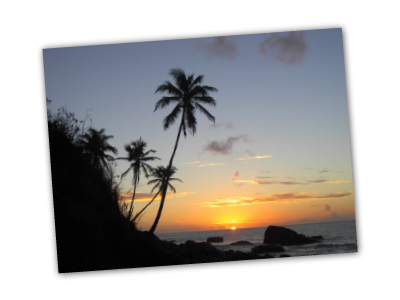

La función que nos permite cargar una imagen es [matplotlib.pyplot.imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html). Admite como primer parámetro, **fname**, una referencia a la imagen a leer. El segundo parámetro, **format**, opcional, es el formato de la imagen.

In [2]:
image = plt.imread("sunset.png")

El resultado de la función *plt.imread* -almacenado en la variable *image* del código anterior- es un array NumPy con el siguiente tamaño:

* (m, n) para imágenes en blanco y negro
* (m, n, 3) para imágenes RGB
* (m, n, 4) para imágenes RGBA (RGB con canal alfa, o canal de transparencia)

Confirmemos el tipo de la variable *image* y el tamaño de la imagen leída:

In [3]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(600, 800, 4)


Efectivamente se trata de un array NumPy. Pero las dimensiones parecen no encajar con lo que vemos: la imagen es más ancha que alta, y sin embargo las dimensiones del array son (600, 800, 4). Para explicar esto debemos recordar que, en un array bidimensional NumPy, el primer eje es el correspondiente a las filas (eje vertical) y el segundo el correspondiente a las columnas (eje horizontal), exactamente al contrario de como solemos interpretar el tamaño de una imagen (siempre damos primero el ancho -el número de columnas- y después el alto -el número de filas-).

Vemos también en el último código ejecutado que la imagen leída es de tipo RGBA (RGB con canal de transparencia).

### Mostrando una imagen

La función utilizada para mostrar una imagen es [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), función que acepta como primer argumento una variable con estructura de array (o imagen PIL):

Creemos un array a mano para ver cómo lo muestra la función:

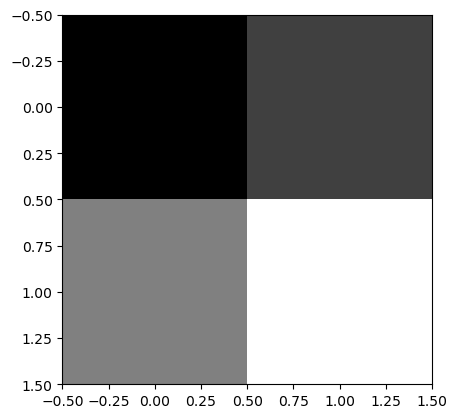

In [4]:
a = np.array([0, 64, 128, 255]).reshape(2, 2)
plt.imshow(a, cmap = "gray");

Con el mapa de colores "gray" que estamos usando, los valores 0 se muestran en negro y los valores 255 en blanco. Comprobamos que la función *plt.imshow* muestra los valores leídos (antes de ejecutar el redimensionado) de izquierda a derecha y de arriba hacia abajo:

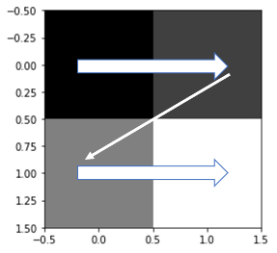

Hagamos otra prueba, esta vez con un array de 5x4 píxels:

In [5]:
a = np.linspace(0, 255, 20).reshape(5, 4)
a

array([[  0.        ,  13.42105263,  26.84210526,  40.26315789],
       [ 53.68421053,  67.10526316,  80.52631579,  93.94736842],
       [107.36842105, 120.78947368, 134.21052632, 147.63157895],
       [161.05263158, 174.47368421, 187.89473684, 201.31578947],
       [214.73684211, 228.15789474, 241.57894737, 255.        ]])

Tal y como hemos definido el array, los valores se incrementan de izquierda a derecha y de arriba abajo:

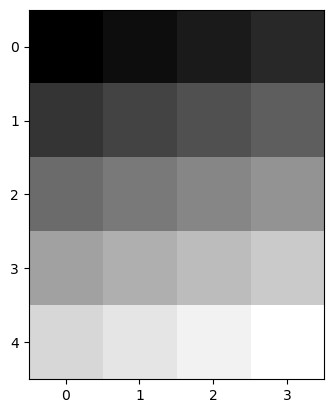

In [6]:
plt.imshow(a, cmap = "gray");

y efectivamente los puntos se muestran más claros hacia la derecha y hacia abajo.

Mostremos entonces la imagen que habíamos leído:

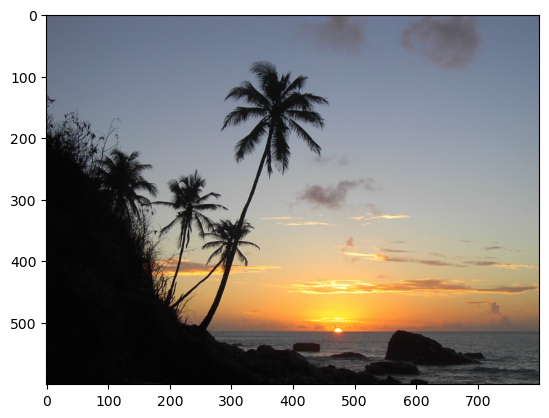

In [7]:
fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

### Conversión de una imagen en color a blanco y negro

Si, por ejemplo, quisiéramos mostrar la imagen leída en blanco y negro, podemos transformar los canales $R$, $G$ y $B$ en un nuevo canal usando [la siguiente fórmula](https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale):

Y' = 0.299 R + 0.587 G + 0.114 B

(lo que podemos conseguir usando la función [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)) y mostrando la imagen resultante con el mapa de color "gray":

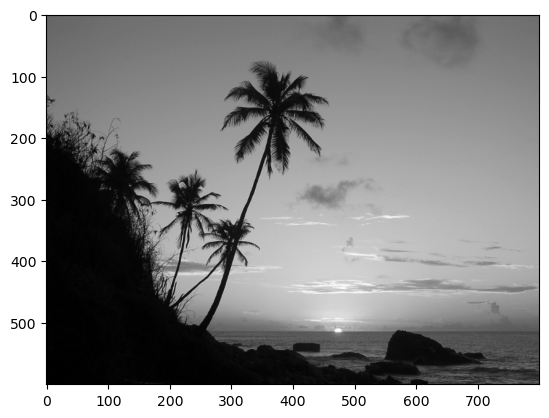

In [8]:
fig, ax = plt.subplots()
gray_image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray_image, cmap = 'gray')
plt.show()

### Canales

El término "canal" es utilizado de forma genérica para referirse a un componente de una imagen que, de una forma u otra, determina el color de cada píxel a mostrar. Por ejemplo, una imagen GIF almacena cada píxel como una referencia a una tabla de colores. En función del modelo de color utilizado, los canales son unos u otros.

El modelo RGB es uno de los más utilizados, representando los componentes rojo, verde y azul en diferentes canales, cada uno de ellos almacenando valores enteros entre 0 y 255 (o valores reales entre 0 y 1).

La imagen vista tiene cuatro canales: los tres correspondientes a los colores rojo, verde y azul, y uno adicional almacenando información de transparencia de la imagen:

In [9]:
image.shape

(600, 800, 4)

Si extraemos un único canal -el primero, por ejemplo, correspondiente a los rojos-:

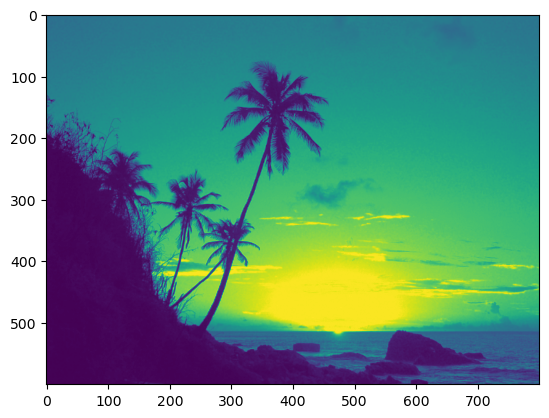

In [10]:
plt.imshow(image[:, :, 0])
plt.show()

no estamos más que extrayendo los valores del componente "rojo" de la imagen, no estamos extrayendo colores, por lo que no es posible establecer una correspondencia real entre los valores de esta capa y los colores reales. Sabiendo que se trata de las intensidades del canal rojo, podríamos simular el aspecto del canal añadiendo como *cmap* una paleta de rojos:

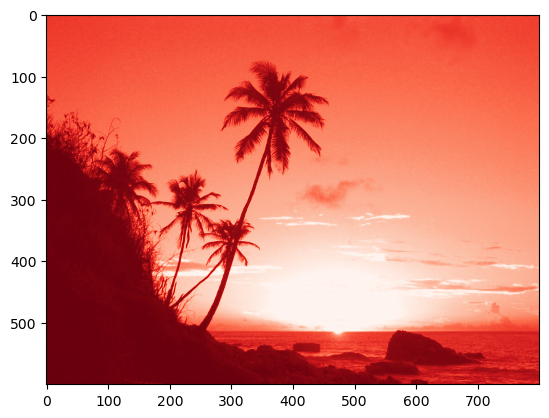

In [11]:
plt.imshow(image[:, :, 0], cmap = "Reds_r")
plt.show()

En todo caso deberemos ser conscientes de que no estamos más que forzando un mapeado artificial entre los valores leídos y el mapa de color.

Podemos mostrar los canales 1 y 2 correspondientes a verdes y azules utilizando el mismo método:

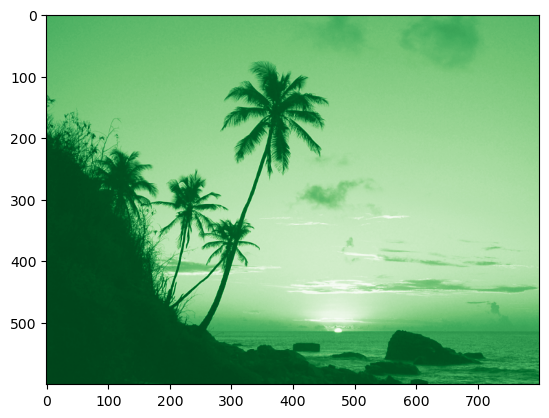

In [12]:
plt.imshow(image[:, :, 1], cmap = "Greens_r")
plt.show()

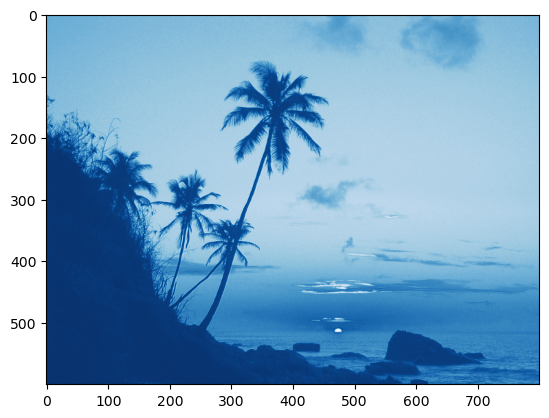

In [13]:
plt.imshow(image[:, :, 2], cmap = "Blues_r")
plt.show()

El cuarto canal (el canal con índice 3, correspondiente a la transparencia) está formado, en este caso particular, por valores de 1 o muy próximos a uno:

In [14]:
np.mean(image[:, :, 3])

0.99998915

indicando que la imagen es opaca. Si mostramos este canal utilizando como "mapeador" una escala de grises que asigne el negro al valor 1 (opaco) y el blanco al valor 0 (transparente), el resultado es el siguiente:

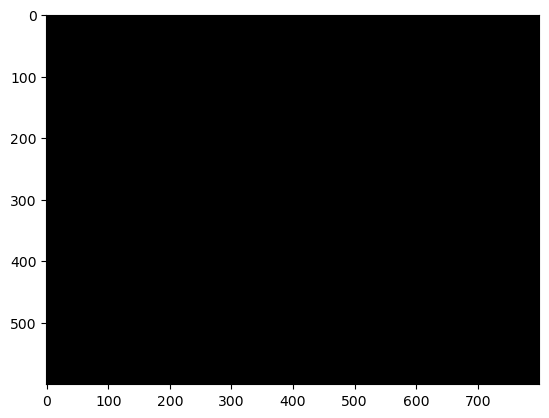

In [15]:
plt.imshow(image[:, :, 3], cmap = "gray_r");

(prácticamente son todos puntos negros -ni es posible apreciar los valores diferentes a 1-)

### La función pcolormesh

Matplotlib ofrece también las funciones equivalentes [matplotlib.pyplot.pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) y [matplotlib.pyplot.pcolor](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html), aunque en la documentación de la librería se recomienda usar la primera, así que nos centramos en ella: en teoría "crea una gráfica en pseudo-colores con un grid no rectangular". Comencemos por su sintaxis:

pcolormesh([x, y,] c, **kwargs)

donde **c** es un array 2D de escalares, valores que serán "mapeados" a un conjunto de colores determinado por el parámetro **cmap**, y **x** e **y**, parámetros opcionales, definen las coordenadas de las esquinas de los rectángulos que se mostrarán del color correspondiente. En resumen, dos claras diferencias con respecto a la función *plt.imshow()*: los datos deben encontrarse en un array de 2 dimensiones (lo que solo ocurre con las imágenes en blanco y negro, cualquier otra no podría mostrarse usando esta función) y los "puntos" de la imagen mostrada no son puntos en realidad, sino rectángulos de tamaños a determinar por los parámetros $x$ e $y$.

De hecho, los "rectángulos" en cuestión están limitados por los valores de $x$ e $y$. Es decir, si en $x$ tenemos, pongamos por caso, los valores 1, 3, y 5, estos tres valores definen dos rectángulos, uno que va a tener como límites en una dimensión los valores 1 y 3, y otro que va a tener como límites los valores 3 y 5.

Veamos esta función en la práctica: Creamos las estructuras $x$ e $y$ (simples listas en este ejemplo), y un array conteniendo los datos a mostrar:

In [16]:
x = [1, 3, 4]
y = [2, 3, 6]

In [17]:
z = np.linspace(0, 255, 4).reshape(2, 2)
z

array([[  0.,  85.],
       [170., 255.]])

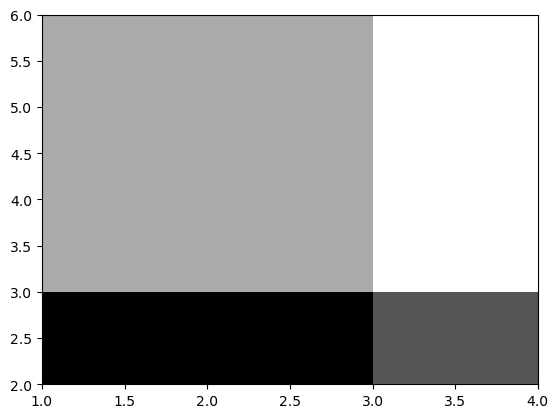

In [18]:
plt.pcolormesh(x, y, z, cmap = "gray", shading = "auto");

Comprobamos que la lista $x$ se representa horizontalmente (de izquierda a derecha), y la lista $y$, verticalmente (de abajo arriba -el valor 0 es representado por el color negro que vemos en la esquina inferior izquierda-), como en cualquier gráfica 2D de las que hemos visto. Comprobamos también que, efectivamente, los valores de $x$ y de $y$ determinan los límites de los rectángulos, lo que significa que el array $z$ no necesita tener más que un elemento menos que $x$ y que $y$.

Según la documentación, la celda $c[i, j]$ viene limitada en su esquina inferior izquierda por $(x[i, j], y[i, j])$ y, en su esquina superior derecha por $(x[i + 1, j + 1], y[i + 1, j + 1])$. Para ver claramente los datos que se utilizan y cómo se disponen en el gráfico, repitamos la anterior gráfica con un mapa de color con una paleta discreta y añadamos un barra de colores:

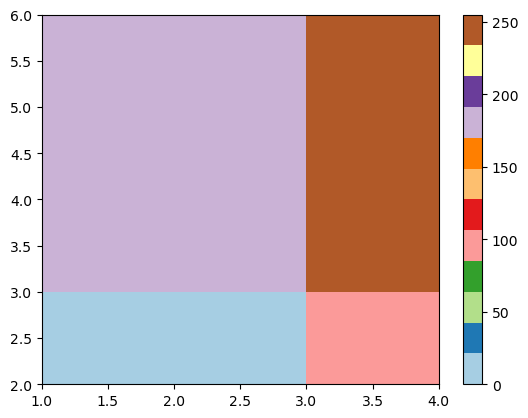

In [19]:
plt.pcolormesh(x, y, z, cmap = "Paired");
plt.colorbar();

Es decir, los datos se muestran de izquierda a derecha y de abajo hacia arriba:

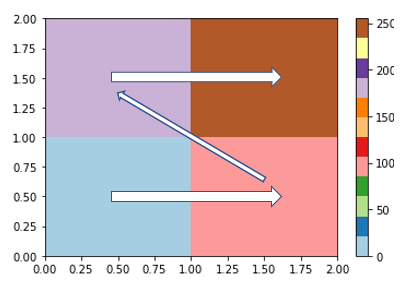

¿Y qué implicaciones tiene esto si se utiliza como array de entrada una imagen? En primer lugar, *plt.pcolormesh()* solo acepta arrays bidimensionales. La imagen vista en el apartado anterior tenía cuatro capas:

In [20]:
image.shape

(600, 800, 4)

Mostremos entonces una de ellas con *plt.pcolormesh()*:

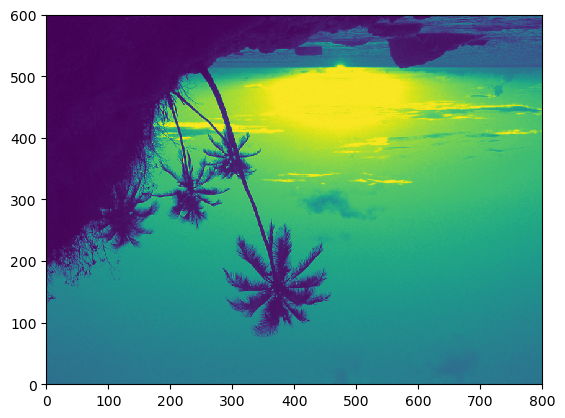

In [21]:
plt.pcolormesh(image[:, :, 0])
plt.show()

Horizontalmente no hay diferencias, pero la imagen se muestra invertida.

### imshow vs. pcolormesh

Resumamos las diferencias entre las funciones *plt.imshow()* y *plt.pcolormesh()*:

* En primer lugar, las cabeceras de las funciones no son las mismas: aparte de otros parámetros, la función *plt.imshow()* acepta como primer argumento un array (o estructura semejante) conteniendo los datos a mostrar. *plt.pcolormesh()* acepta las posiciones $x$ e $y$ de los bloques a colorear (ambos parámetros opcionales) y los datos en sí (uno menos por dimensión que $x$ e $y$).

matplotlib.pyplot.imshow(X, ...)

pcolor([x, y,] c, ...)

* Ambas funciones muestran los datos de izquierda a derecha, pero la función *plt.imshow()* considera el origen de coordenadas en la esquina superior izquierda -convención habitual en procesamiento de imágenes- mientras que *plt.pcolormesh()* lo considera en la esquina inferior izquierda:

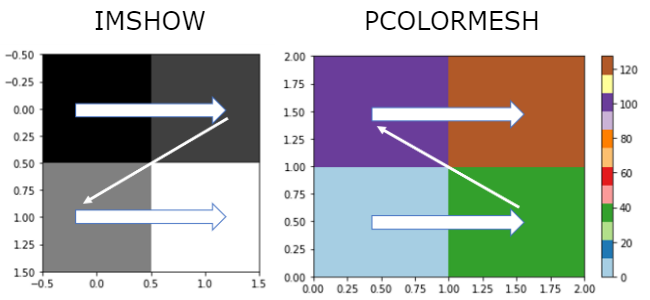

* Los elementos coloreados son píxels en el caso de *plt.imshow()* y rectángulos en el caso de *plt.pcolormesh()*.
* Los elementos coloreados se muestran en posiciones $(i, j)$ -siendo $i$ y $j$ números enteros consecutivos a partir de 0- en *plt.imshow()*, y, en *plt.pcolormesh()*, en las posiciones dadas por los arrays $x$ e $y$ con los que se invoca la función. Si no se incluyen los parámetros $x$ e $y$, entonces se muestran también en posiciones de 0 en adelante.
* La función *plt.imshow()* está diseñada para mostrar imágenes, lo que supone que el array de entrada deberá tener tamaño $(m, n)$, $(m, n, 3)$ o $(m, n, 4)$. *plt.pcolormesh()* acepta solo arrays de dos dimensiones $(m, n)$.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Guardando las figuras en disco

La función [matplotlib.pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) nos permite guardar en disco la figura actual. Esta función debe ser ejecutada antes de la función *plt.show()*, y soporta varios parámetros que nos van a permitir configurar la forma en la que se va a realizar el proceso:

* **fname**: El primer parámetro es el nombre que va a recibir el fichero.
* **dpi**: Resolución en puntos por pulgada de la imagen generada.
* **quality**: Calidad de la imagen en una escala entre 1 (la peor) y 95 (la mejor). Solo aplicable en formatos jpg o jpeg. No deben fijarse valores superiores a 95.
* **orientation**: Orientación de la figura ('*landscape*', '*portrait*')
* **format**: Formato de la figura (png, pdf, ps, eps, jpg...)

En la documentación disponemos del conjunto completo de parámetros posibles.

Para probarla, creemos una versión oscurecida de *sunset* (por ejemplo, elevando al cuadrado sus valores) y guardemos la figura:

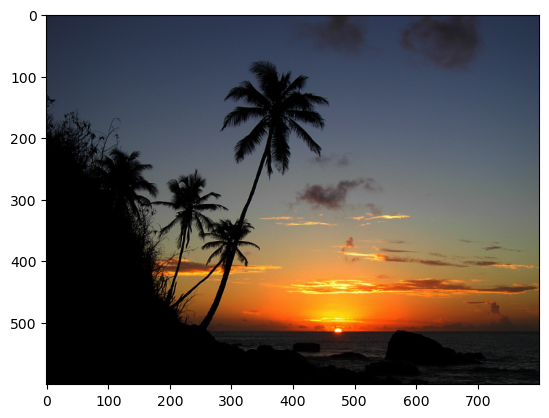

In [22]:
dark_image = np.square(image)
fig, ax = plt.subplots()
ax.imshow(dark_image)
fig.savefig("dark_sunset.png")
plt.show()

Y ahora leamos la imagen guardada:

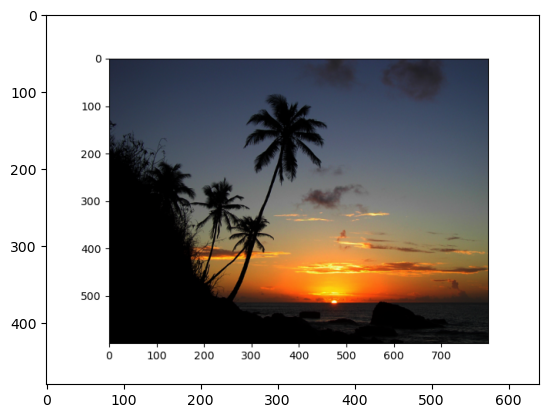

In [23]:
dark_image = plt.imread("dark_sunset.png")
plt.imshow(dark_image)
plt.show()

Comprobamos que se ha almacenado toda la figura, no solo la imagen, cosa que podemos apreciar por el marco blanco que se muestra alrededor de la imagen original.

# Gráficos estáticos y dinámicos

Las *magics* de Jupyter incluyen la posibilidad de mostrar las gráficas de Matplotlib de forma estática o dinámica:

In [24]:
%matplotlib inline

Esta instrucción, una vez ejecutada, provoca que las imágenes se muestren estáticas dentro del código (comportamiento por defecto en Jupyter). Por el contrario, la ejecución de la siguiente instrucción:

In [25]:
%matplotlib notebook

provoca que las imágenes generadas sean interactivas (y se muestren también insertadas en el cuaderno jupyter). Eso sí, esta funcionalidad solo está soportada en versiones de Jupyter antiguas.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>